In [ ]:
import sys
sys.path.append('/home/abigaile-woodbury/Research/cp_reach')
import cp_reach as cp
import json
from matplotlib import pyplot as plt
import numpy as np
import cp_reach.quadrotor.log_linearized
import cp_reach.flowpipe.flowpipe

ModuleNotFoundError: No module named 'cp_analyzer'

In [ ]:
file = '/home/micah/example/drone_specs.json'
with open(file, 'r') as file:
    # Load the data from the JSON file
    quadrotor = json.load(file)
# cp.quadrotor.log_linearized.disturbance(quadrotor, ax1)
ref = cp_reach.sim.multirotor_plan.traj_3()

In [ ]:
np.savez("ref_traj.npz", **ref)

In [ ]:
ref = dict(np.load("ref_traj.npz"))
quad2 = {'thrust_disturbance': 2.0, 'gyro_disturbance':2.0}

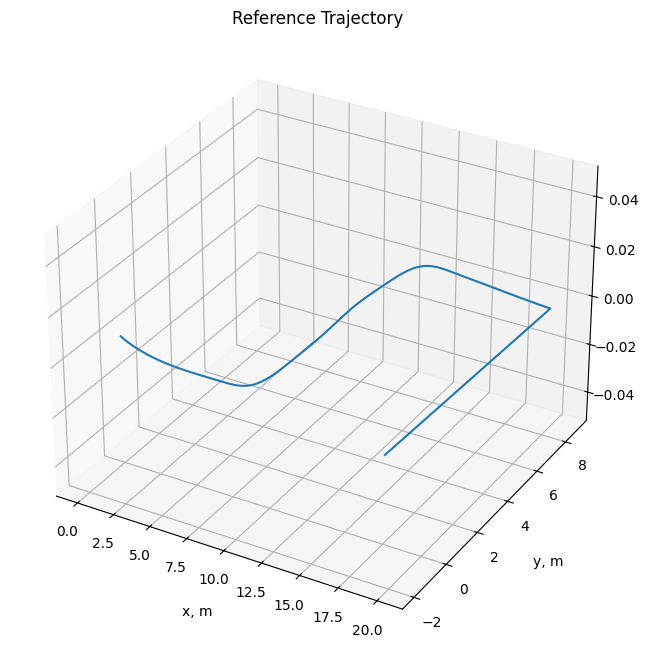

In [ ]:
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(111, projection="3d")
cp_reach.sim.multirotor_plan.plot_trajectory3D(ref, axis)

In [ ]:
inv_points, points_algebra, lower_bound, upper_bound,sol = cp_reach.quadrotor.log_linearized.disturbance(quad2, ref)

In [ ]:
print(lower_bound)

[-3.40606191 -3.28822534 -3.08467977 -1.38760828 -1.46586088 -1.77941882]


In [ ]:
print(upper_bound)

[3.40799349 3.35956888 3.21751428 1.43447397 1.39913521 1.7519755 ]


In [ ]:
print(inv_points)

[[-0.23039113 -0.23039113 -0.23039113 ... -2.21021841 -2.21021841
  -2.21021841]
 [ 3.22133582  3.22133582  3.22133582 ... -2.33591058 -2.33591058
  -2.33591058]
 [-0.84467971 -0.84467971 -0.84467971 ... -0.89555832 -0.89555832
  -0.89555832]
 [-1.05390436 -1.05390436 -1.05390436 ...  0.62997886  0.62997886
   0.62997886]
 [-0.30750779 -0.30750779 -0.30750779 ...  0.94851463  0.94851463
   0.94851463]
 [ 1.00055636  1.00055636  1.00055636 ... -0.48924366 -0.48924366
  -0.48924366]]


In [ ]:
flowpipes_list, nominal_traj = cp_reach.flowpipe.flowpipe.flowpipes(
    ref=ref,             # your dict with keys 'x', 'y', 'z'
    step=1,                # number of segments
    w1=1,              # linear disturbance (scalar or vector)
    omegabound=1,     # angular disturbance (scalar or vector)
    sol=sol,             # output of SE23LMIs
    axis='xy'            # 'xy' or 'xz'
)



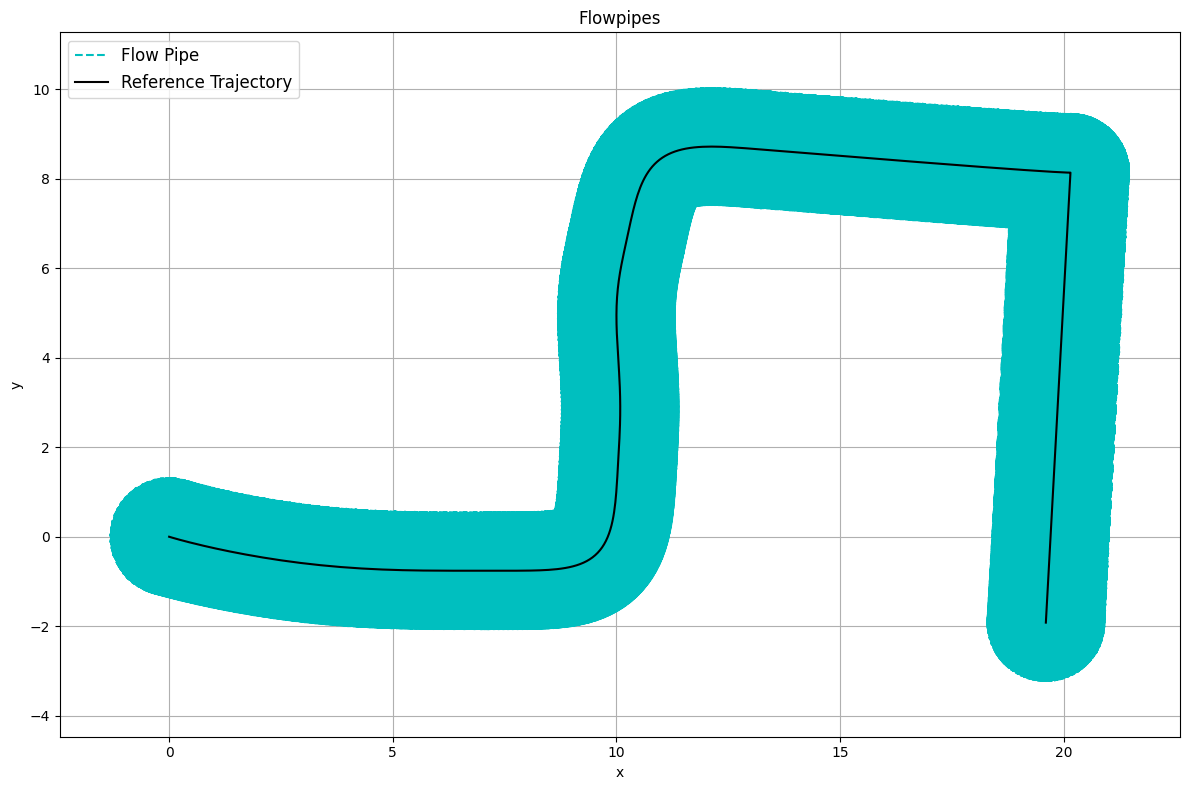

In [ ]:
cp_reach.flowpipe.flowpipe.plot_flowpipes(nominal_traj, flowpipes_list, axis='xy')

In [ ]:
def plot2DInvSet(points, inv_points):
    plt.figure(figsize=(14,7))
    plt.rcParams.update({'font.size': 12})
    ax1 = plt.subplot(121)
    ax1.plot(points[0, :], points[1, :], 'g', label='with Dynamic Inversion')
    ax1.set_xlabel('$\\zeta_x$, m')
    ax1.set_ylabel('$\\zeta_y$, m')

    plt.axis('equal')
    plt.grid(True)
    
    ax2 = plt.subplot(122)
    ax2.plot(inv_points[0, :-1], inv_points[1, :-1], 'g', label='with Dynamic Inversion')
    
    ax2.set_xlabel('$\\eta_x$, m')
    ax2.set_ylabel('$\\eta_y$, m')
    plt.grid(True)

    plt.axis('equal')
    plt.tight_layout()
    ax1.set_title('Invariant Set in Lie Algebra', fontsize=20)
    ax2.set_title('Invariant Set in Lie Group', fontsize=20)


In [ ]:
def plot2DInvSet(points, inv_points, ref_traj=None, save_path=None):
    """
    Plot 2D projections of invariant sets in Lie algebra and Lie group.

    Parameters:
        points      : np.ndarray (6×N), points in the Lie algebra
        inv_points  : np.ndarray (6×N), exponential map of points (Lie group)
        ref_traj    : np.ndarray (optional), shape (2×T), reference trajectory [x, y]
        save_path   : str (optional), if provided saves the figure to this path
    """

    plt.figure(figsize=(14, 6))
    plt.rcParams.update({'font.size': 12})

    # --- Lie Algebra Plot ---
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(points[0], points[1], 'g', label='Invariant Set (Lie Algebra)')
    ax1.set_xlabel(r'$\zeta_x$ [m]')
    ax1.set_ylabel(r'$\zeta_y$ [m]')
    ax1.set_title('Invariant Set in Lie Algebra', fontsize=16)
    ax1.axis('equal')
    ax1.grid(True)
    ax1.legend()

    # --- Lie Group Plot ---
    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(inv_points[0], inv_points[1], 'g', label='Invariant Set (Lie Group)')

    # Optional reference trajectory
    if ref_traj is not None:
        ax2.plot(ref_traj[0], ref_traj[1], 'k--', label='Reference Trajectory')

    ax2.set_xlabel(r'$\eta_x$ [m]')
    ax2.set_ylabel(r'$\eta_y$ [m]')
    ax2.set_title('Invariant Set in Lie Group', fontsize=16)
    ax2.axis('equal')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()

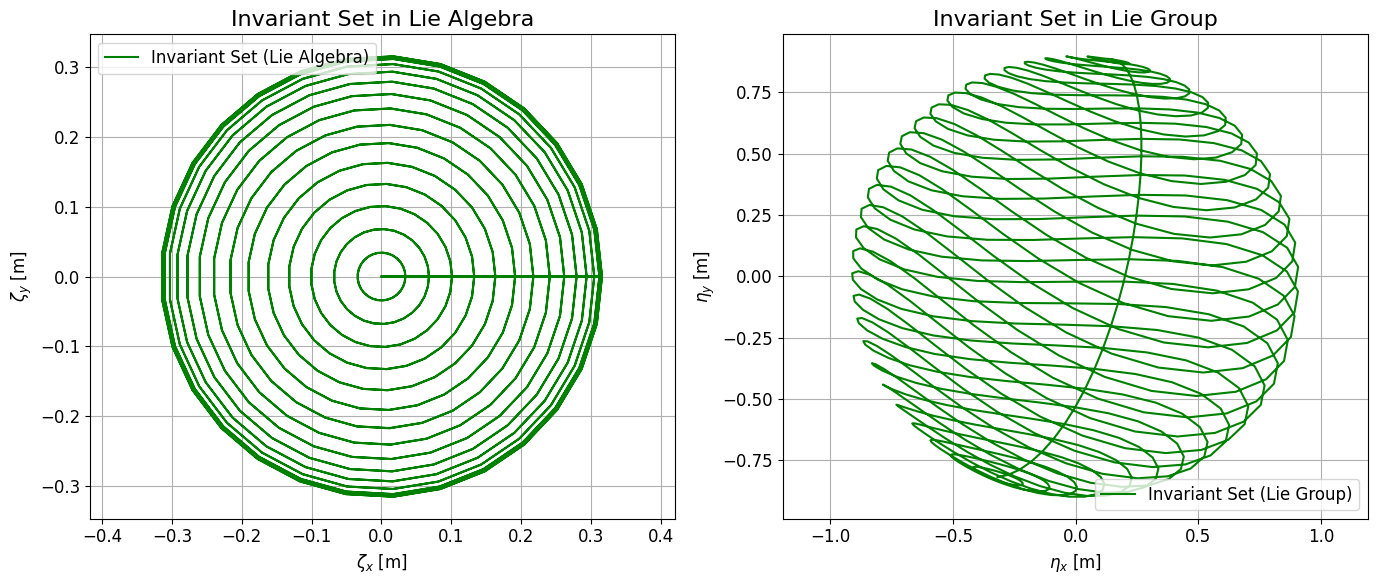

In [ ]:
plot2DInvSet(points_algebra,inv_points)

In [ ]:
def plot3DInvSet(points, inv_points):
    plt.figure(figsize=(14,7))
    ax1 = plt.subplot(121, projection='3d', proj_type='ortho', elev=40, azim=20)
    ax1.plot3D(points[0, :], points[1, :], points[2, :],'g', label='with Dynamic Inversion')
    ax1.set_xlabel('$\\zeta_x$, m')
    ax1.set_ylabel('$\\zeta_y$, m')
    ax1.set_zlabel('$\\zeta_z$, rad', labelpad=1)
    ax1.set_title('Invariant Set in Lie Algebra', fontsize=20)

    plt.axis('auto')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    ax2 = plt.subplot(122, projection='3d', proj_type='ortho', elev=40, azim=20)

    ax2.plot3D(inv_points[0, :], inv_points[1, :], inv_points[2, :], 'g', label='with Dynamic Inversion')

    ax2.set_xlabel('$\\eta_x$, m')
    ax2.set_ylabel('$\\eta_y$, m')
    ax2.set_zlabel('$\\eta_z$, rad')
    ax2.set_title('Invariant Set in Lie Group', fontsize=20)
    plt.axis('auto')
    plt.subplots_adjust(left=0.45, right=1, top=0.5, bottom=0.08)

    plt.tight_layout()

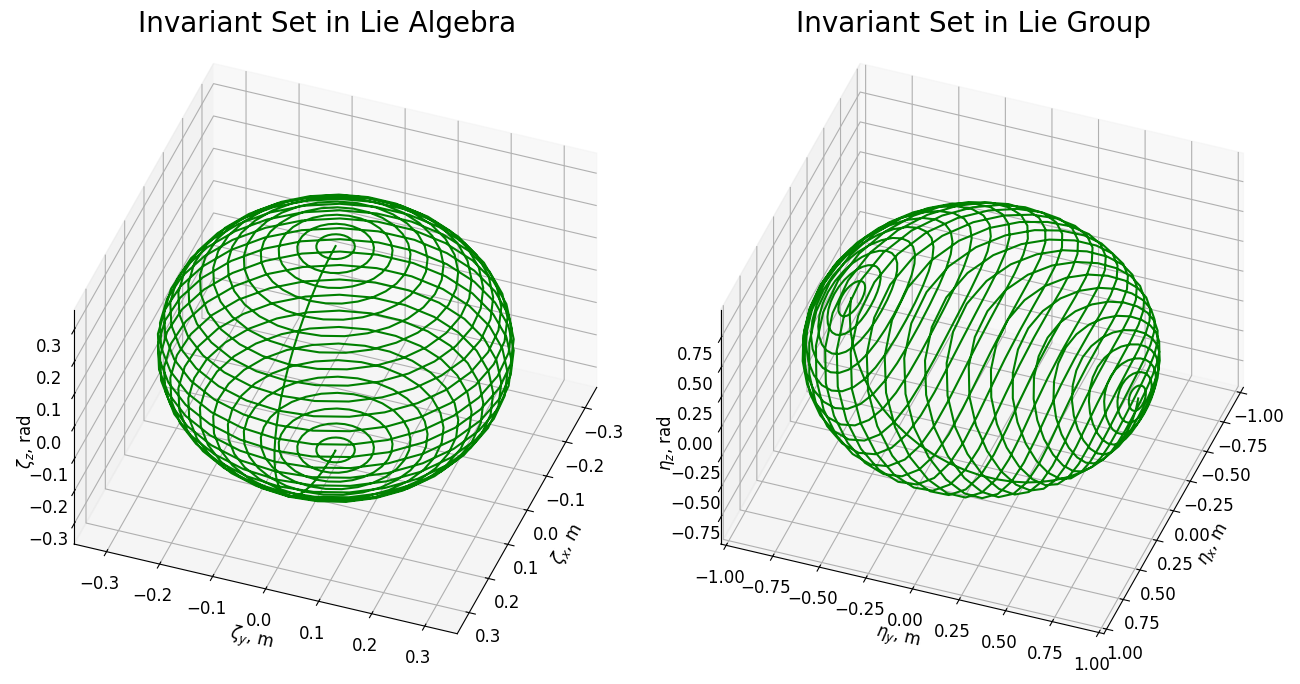

In [ ]:
plot3DInvSet(points_algebra, inv_points)

In [ ]:
def plot_hull(ref, num_pipes, ebeta, w1, omegabound, sol_LMI, 'xy')
    # Calculate convex hull for flow pipes
    flowpipes_traj, intervalhull_traj, nom_traj, t_vect = flowpipe.flowpipes(ref, num_pipes, ebeta, w1, omegabound, sol_LMI, 'xy')
    plt.savefig('fig/interval_hull.png')
    plt.close()
    
    print("plotting flow pipes")
    print(datetime.datetime.now())
    print('plotting flow pipes')
    flowpipe.plot_flowpipes(nom_traj, flowpipes_traj, num_pipes, 'xy')
    plt.savefig('fig/flow_pipes.png')
    # plt.savefig("/home/micah/example/flow_pipes.png")
    plt.close()
    
    print('plotting sim')
    print(datetime.datetime.now())
    mr_control.plot_sim(ref, w1, omegabound, flowpipes_traj, n, 'xy')
    print("done plotting sim")
    print(datetime.datetime.now())
    # print('plotting time history')
    # plot_timehis(sol_LMI, ref, w1, w2, 40, ebeta)